Movie recommendation system 
using tensorflow and keras are widely used in field of deep learning and machine learning.why?
1. ease of use and rapid development 
2. powerful and scable 
3. Extensive ecosystem and community support 
4. Integration with other technologies


why is used tensorflow and keras for this movie recommendation system?
As i mentioned above, clearly show case the role of tensorflow and keras in deep learning and machine learning. here are some summary of how tensorflow and keras helps in building a recommendation system. 
1. data handling and preprocessing
   TensorFlow and Keras can easily integrate with data handling libraries like Pandas for preprocessing tasks. This includes encoding categorical variables (e.g., user IDs, movie IDs) and normalizing ratings.

2. Model Building
    Keras simplifies the creation of neural network models with its high-level API. You can define input layers, embedding layers for users and movies, and dense layers for processing the embeddings.

3. Model Training
   Keras makes it straightforward to compile and train models, providing built-in methods for specifying optimizers, loss functions, and metrics.

4. evaluation and visualization
   TensorFlow and Keras provide tools for evaluating model performance and visualizing training history, such as loss curves.


In [1]:
import pandas as pd
import numpy as np

movie_ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [2]:
movie_ratings.sample(4)

,userId,movieId,rating,timestamp
90697,590,1266,4.5,1258421353
13533,88,8677,0.5,1331421241
4611,28,40819,2.5,1236313271
33727,229,587,3.0,838144399


In [3]:
movies.sample(4)

,movieId,title,genres
7207,72737,"Princess and the Frog, The (2009)",Animation|Children|Fantasy|Musical|Romance
1967,2612,Mildred Pierce (1945),Drama|Film-Noir
3187,4296,Love Story (1970),Drama|Romance
143,171,Jeffrey (1995),Comedy|Drama


In [4]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [5]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [6]:
movie_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
df_data = pd.merge(movie_ratings, movies, on='movieId')
df_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


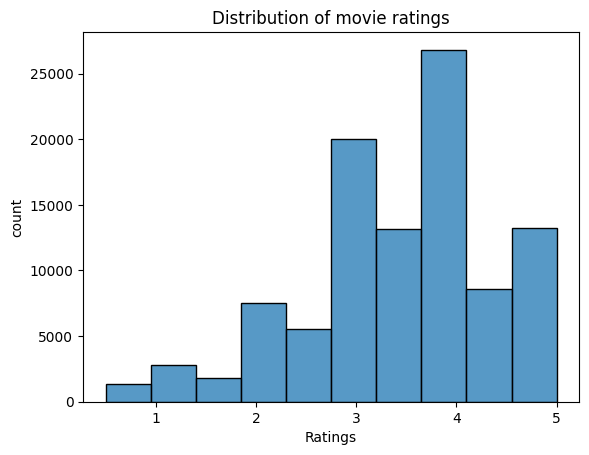

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_data['rating'],bins=10,kde=False)
plt.xlabel('Ratings')
plt.ylabel('count')
plt.title('Distribution of movie ratings')
plt.show()

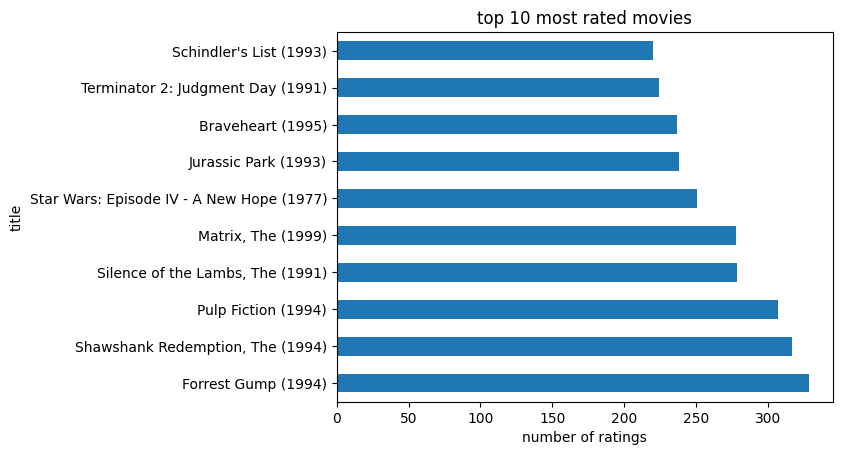

In [10]:
# number of ratings per movie

movie_ratings_count = df_data.groupby('title')['rating'].count().sort_values(ascending = False)
movie_ratings_count.head(10).plot(kind  = 'barh')
plt.xlabel('number of ratings')
plt.title('top 10 most rated movies')
plt.show()

Encode the user IDs and movie IDs to ensure they are in suitable format for the model. 
explanation :
label_encoder = converting categorical data into numerical data

In [11]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [12]:
user_IDs_enc = LabelEncoder()
movie_ratings['user'] = user_IDs_enc.fit_transform(movie_ratings['userId'])

movies_IDs_enc = LabelEncoder()
movie_ratings['movie'] = user_IDs_enc.fit_transform(movie_ratings['movieId'])

movie_ratings['rating'] = movie_ratings['rating'].values.astype('float32')

n_users = movie_ratings['user'].nunique()
n_movies = movie_ratings['movie'].nunique()

In [13]:
n_users

610

In [14]:
n_movies

9724

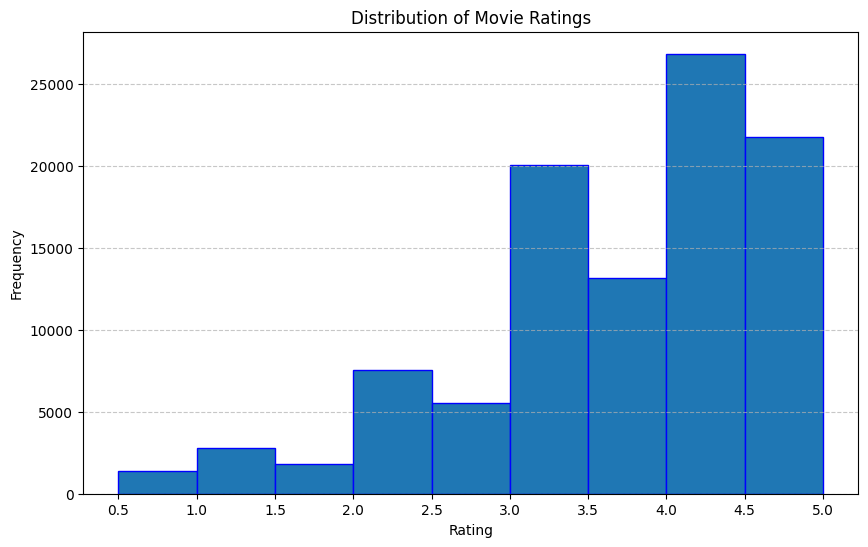

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings['rating'], bins=np.arange(0.5, 5.5, 0.5), edgecolor='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram shows the frequency of each rating, providing insights into
how ratings are spread across the dataset.

building a model using tensorflow and keras

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense,Concatenate,Dropout
from tensorflow.keras.models import Model

movie_user_input = Input(shape=(1,), name = 'movie_user_input')
movie_input = Input(shape = (1,), name = 'movie_input')

movie_user_embedding = Embedding(input_dim =n_users,output_dim = 50,name = 'movie_user_embedding' )(movie_user_input)
movie_embedding = Embedding(input_dim =n_movies,output_dim = 50,name = 'movie_embedding' )(movie_input)

movie_user_flatten = Flatten()(movie_user_embedding)
movie_flatten = Flatten()(movie_embedding)

concatenated = Concatenate()([movie_user_flatten,movie_flatten])

dense_1 = Dense(128, activation='relu')(concatenated)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(64, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(dense_2)
output = Dense(1)(dropout_2)

model = Model([movie_user_input,movie_input],output)

Input layers: user_input and movie_input are placeholders for user and movie IDs.
Embedding layers: user_embedding and movie_embedding create dense vector representations (embeddings) for users and movies.
Flatten layers: user_flatten and movie_flatten convert the 2D embeddings into 1D vectors.
Concatenate layer: Combines the user and movie vectors into a single vector.
Dense layers: dense_1 and dense_2 are fully connected layers that process the concatenated vector.
Output layer: Produces a single value representing the predicted rating.
Model compilation: Configures the model for training with the Adam optimizer and mean squared error loss.

In [17]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)    ┃ Output Shape ┃ Param # ┃ Connected to  ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ movie_user_inp… │ (None, 1)    │       0 │ -             │
│ (InputLayer)    │              │         │               │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ movie_input     │ (None, 1)    │       0 │ -             │
│ (InputLayer)    │              │         │               │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ movie_user_emb… │ (None, 1,    │  30,500 │ movie_user_i… │
│ (Embedding)     │ 50)          │         │               │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ movie_embedding │ (None, 1,    │ 486,200 │ movie_input[… │
│ (Embedding)     │ 50)          │         │               │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ flatten         │ (None, 50)   │       0 │ movie_user_e… │
│ (Flatten)       │              │         │               │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ flatten_1       │ (None, 50)   │       0 │ movie_embedd… │
│ (Flatten)       │              │         │               │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ concatenate     │ (None, 100)  │       0 │ flatten[0][0… │
│ (Concatenate)   │              │         │ flatten_1[0]… │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ dense (Dense)   │ (None, 128)  │  12,928 │ concatenate[… │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ dropout         │ (None, 128)  │       0 │ dense[0][0]   │
│ (Dropout)       │              │         │               │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ dense_1 (Dense) │ (None, 64)   │   8,256 │ dropout[0][0] │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ dropout_1       │ (None, 64)   │       0 │ dense_1[0][0] │
│ (Dropout)       │              │         │               │
├─────────────────┼──────────────┼─────────┼───────────────┤
│ dense_2 (Dense) │ (None, 1)    │      65 │ dropout_1[0]… │
└─────────────────┴──────────────┴─────────┴───────────────┘

 Total params: 537,949 (2.05 MB)

 Trainable params: 537,949 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
X = movie_ratings[['user', 'movie']]
y = movie_ratings['rating']

train_test_split randomly splits the data into 80% training and 20% testing sets.
X_train and X_test contain the user and movie IDs for training and testing.
y_train and y_test contain the ratings for training and testing.
Train the Model

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit trains the model for 10 epochs with a batch size of 64.
validation_data specifies the data to evaluate the model after each epoch.


In [20]:
history = model.fit([X_train['user'], X_train['movie']], y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=([X_test['user'], X_test['movie']], y_test))

Epoch 1/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 2.7802 - val_loss: 0.8178
Epoch 2/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 1.0982 - val_loss: 0.7979
Epoch 3/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.9311 - val_loss: 0.7716
Epoch 4/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.8246 - val_loss: 0.7709
Epoch 5/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.7466 - val_loss: 0.7638
Epoch 6/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.6870 - val_loss: 0.7649
Epoch 7/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - loss: 0.6399 - val_loss: 0.7660
Epoch 8/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.6041 - val_loss: 0.7699
Epoch 9/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 0.5702 - val_loss: 0.7767
Epoch 10/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.5462 - val_loss: 0.7850


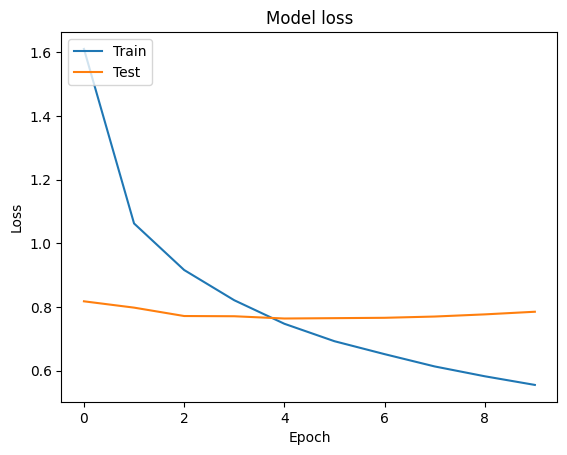

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [22]:
y_pred = model.predict([X_test['user'], X_test['movie']])

631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [23]:
# Calculate additional metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")

Test MSE: 0.7850021719932556
Test RMSE: 0.8860034942626953
Test MAE: 0.6751143932342529


In [24]:
evaluation_results = model.evaluate([X_test['user'], X_test['movie']], y_test)

631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7943


In [25]:
evaluation_results

0.7850019335746765

In [27]:
model.save('movie_recommendation_model.h5')
